In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('src/data/K_6203_17_250X600_625_2m_res16_ACNR.txt')

In [23]:
image_per_spectrum = df.columns.size - 2
n_spectrum = df.values.shape[0]

df.columns = ['x', 'y'] + np.arange(image_per_spectrum).tolist()

image_per_spectrum, n_spectrum

(420, 3840)

In [24]:
width = len(set(df['x'].values))
height = len(set(df['y'].values))

x = {_x : ind for ind, _x in enumerate(sorted(list(set(df['x'].values))))}
y = {_y : ind for ind, _y in enumerate(sorted(list(set(df['y'].values))))}

width, height, n_spectrum

(40, 96, 3840)

In [25]:
from multiprocessing import sharedctypes

X = np.random.random((n_spectrum, width, height))
result = np.ctypeslib.as_ctypes(np.zeros((n_spectrum, width, height)))
shared_array = sharedctypes.RawArray(result._type_, result)

In [26]:
def multi_run_wrapper(args):
    return read_images(*args)

def read_images(start, end):
    imgs = np.ctypeslib.as_array(shared_array)
    for n in range(start, end):
        for _x in x:
            for _y in y:
                imgs[n, x[_x], y[_y]] = df.loc[df['x'] == _x].loc[df['y'] == _y].values[0,n+2]

In [27]:
from multiprocessing import Pool

with Pool(processes=4) as pool:
    pool.map(multi_run_wrapper, [(0, 3),(3, 6), (6, 9)])

In [28]:
result = np.ctypeslib.as_array(shared_array)

In [29]:
for ind in range(9):
    mean, var = np.mean(result[ind]), np.std(result[ind])
    result[ind] -= mean
    result[ind] /= var

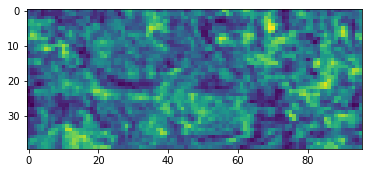

In [30]:
plt.imshow(result[0])

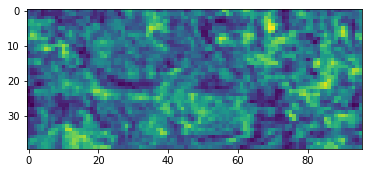

In [31]:
plt.imshow(result[4])

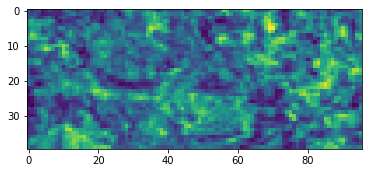

In [32]:
plt.imshow(result[7])